<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/ML%26DL/Review/2%EC%A3%BC%EC%B0%A8_%EB%B3%B5%EC%8A%B5(12_04_~_12_08).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 12월 4일

### Confusion Matrix
- TP(True Positive) -> 실제 결과는 True, 예측 결과도 True
- FP(False Positive) -> 실제 결과는 False, 예측 결과는 True
- TN(True Negative) -> 실제 결과는 False, 예측결과도 False
- FN(False Negative) -> 실제 결과는 True, 예측결과는 False

### Accuracy(정확도)
- TP + TN / (TP + TN + FP + FN)
- 모든 경우 중 결과와 예측값이 일치하는 경우

### Recall(재현률)
- TP / TP + FN
- 실제 결과가 True인 것 중 우리 모델이 True라고 예측한 것

### Precision(정밀도)
- TP / TP + FP
- 우리 모델이 True라고 예측한 것 중 실제 True인 것

### F1-Score
- 2 * (Precision * Recall / [Precision + Recall])

### Recall과 Precision은 서로 반비례 관계이다!

### Overfitting(과적합)
- 예측결과가 너무 잘 맞아떨어지는 것
- 해결방법??
- 1. 많은 Training Data 사용
- 2. Feature의 개수를 줄인다
- 3. Deep Learning의 Dropout 기법 사용
- 4. Weight 값이 커지지 않게 인위적으로 조절!

### Imbalanced Data Problem
- 데이터 불균형 문제
- oversampling(SMOTE 알고리즘)

## 코드 부분

In [ ]:
# Logistic Regression을 구현해 보아요!
# 필요 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Raw Data Loading
# Data Featuring 과정에서 3가지는 기본적으로 해야한다
# 결측치 처리, 이상치 처리, 정규화

df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/admission.csv')
df

# admission 파일은 3개의 독립변수와 1개의 종속변수로 구성되어 있다.
# feature - gre,gpa,rank / target - admit

# 1. 결측치 처리 --> 결측치는 없는 것을 알 수 있다
df.isnull().sum()

# 2. 이상치 처리 -> boxplot, zscore 사용
# fig = plt.figure()

# fig_gre = fig.add_subplot(1,3,1)
# fig_gpa = fig.add_subplot(1,3,2)
# fig_rank = fig.add_subplot(1,3,3)

# fig_gre.boxplot(df['gre'])
# fig_gpa.boxplot(df['gpa'])
# fig_rank.boxplot(df['rank'])

# plt.tight_layout()
# plt.show()
# boxplot상에서는 이상치로 보일 수 있어도
# 실제 수치상으로는 이상치가 아닌 경우가 있다!!
# 이 경우, 실제 데이터로는 이상치가 아니지만 학습을 위해 이상치 제거하고 진행
zscore_threshold = 2.0
for col in df.columns:
    outlier = df[col][np.abs(stats.zscore(df[col])) > zscore_threshold]
    df = df.loc[np.isin(df[col], outlier, invert=True)]

# 정규화 진행
x_data = df.drop('admit',axis=1,inplace=False).values
t_data = df['admit'].values.reshape(-1,1)

scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

In [ ]:
# 모델을 구현해 보아요!
# Tensorflow부터 해볼거에요!
model = Sequential()

model.add(Flatten(input_shape=(3,)))
model.add(Dense(units=1,
                activation='sigmoid'))

model.compile(optimizer=SGD(learning_rate=1e-4),
              loss='binary_crossentropy')

model.fit(x_data_norm,
          t_data,
          epochs=500,
          verbose=0)

# predict
predict_value = np.array([[600, 3.8, 1]])
predict_value_norm = scaler.transform(predict_value)
model.predict(predict_value_norm)

1/1 [==============================] - 0s 70ms/step


array([[0.3659082]], dtype=float32)

In [ ]:
# sklearn으로 구현해 보아요
sklearn_model = linear_model.LogisticRegression()
sklearn_model.fit(x_data,t_data)
sklearn_model.predict_proba(predict_value)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0.43740782, 0.56259218]])

In [ ]:
# 필요 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Raw Dat Loading
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/ozone.csv')
df

training_data = df[['Solar.R','Wind','Temp','Ozone']]
training_data

# 결측치 처리
# 제거하는게 항상 좋은 방법은 아니지만 여기서는 학습을 위해 우선 제거!
training_data = training_data.dropna(how='any')
training_data

# 이상치 처리
# Ozeon에 대해서만 처리할 예정이에요
outlier = training_data['Ozone'][np.abs(stats.zscore(training_data['Ozone']))>zscore_threshold]
training_data = training_data.loc[np.isin(training_data['Ozone'],outlier,invert=True)]

# 데이터 분리
x_data = training_data.drop('Ozone',axis=1,inplace=False)
t_data = training_data['Ozone']

# 정규화 진행
# 독립, 종속변수 모두 실행
scaler_x = MinMaxScaler()
scaler_t = MinMaxScaler()

scaler_x.fit(x_data)
scaler_t.fit(t_data)

x_data_norm = scaler_x.transform(x_data)
t_data_norm = scaler_t.transform(t_data)


In [ ]:
# Imbalanced Data Problem을 해결해보아요!
# SMOTE 알고리즘을 이용

# 불균형한 데이터가 필요
# 유방암 데이터 사용할 예정(매우 유명한 데이터)

# 상당히 많은 feature 중 4개만 골라서 사용 예정
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data,
                  columns=data.feature_names)

df = df[['mean radius', 'mean texture', 'mean area', 'mean symmetry']]
df

# target이 0이면 음성종양(나쁜거), 1이면 양성종양(좋은거) -> 열 지정
df['target'] = data.target
df

,mean radius,mean texture,mean area,mean symmetry,target
0,17.99,10.38,1001.0,0.2419,0
1,20.57,17.77,1326.0,0.1812,0
2,19.69,21.25,1203.0,0.2069,0
3,11.42,20.38,386.1,0.2597,0
4,20.29,14.34,1297.0,0.1809,0
...,...,...,...,...,...
564,21.56,22.39,1479.0,0.1726,0
565,20.13,28.25,1261.0,0.1752,0
566,16.60,28.08,858.1,0.1590,0
567,20.60,29.33,1265.0,0.2397,0


In [ ]:
# 위의 데이터셋은 label이 0 or 1로 구성되어 있어요.
# 이진분류 문제.. => logistic regression으로 나중에 학습이 될꺼예요!

# 학습하기 전에..데이터부터 정제해야 해요!
# label의 개수를 한번 세어 보아요!
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

x_data = df[['mean radius', 'mean texture', 'mean area', 'mean symmetry']]
t_data = df['target']

new_x, new_t = SMOTE(random_state=22).fit_resample(x_data,t_data)
new_t.value_counts()

0    357
1    357
Name: target, dtype: int64

# 12월 5일

In [ ]:
# 유방암 데이터를 가지고 로지스틱 회귀 진행
# 필요 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
# Raw Data Loading
data = load_breast_cancer()
x_data = data.data
t_data = data.target

x_data.shape
t_data.shape

# 결측치는 없구요!
# 이상치는 처리하지 않을꺼예요. 수치상으로는 이상치이지만
# 실제로는 이상치가 아니거든요!
# but, 정규화는 진행해야 해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 정규화가 끝났으니, train, test용으로 분리를 해야해요
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.2,
                 random_state=3)

In [ ]:
# sklearn 모델로 구현
sklearn_model = linear_model.LogisticRegression()

# 학습을 진행하기 전에 cross validation 진행해볼게요!
# train data를 가지고 수행해요!
score = cross_val_score(sklearn_model,
                        x_data_train_norm,
                        t_data_train,
                        cv=5)
score
np.mean(score)  # 평균 validation_accuracy

# 학습진행
sklearn_model.fit(x_data_train_norm,
                  t_data_train)

# 모델 최종 평가
result = sklearn_model.score(x_data_test_norm,
                             t_data_test)
result


0.9649122807017544

In [ ]:
# Tensorflow 구현
keras_model = Sequential()

keras_model.add(Flatten(input_shape=(30,)))
keras_model.add(Dense(units=1,
                      activation='sigmoid'))

keras_model.compile(optimizer=Adam(learning_rate = 1e-1),
                    loss='binary_crossentropy',
                    metrics=['acc'])

keras_model.fit(x_data_train_norm,
                t_data_train,
                epochs=300,
                verbose=1,
                validation_split=0.2)

# loss: 0.0415 - acc: 0.9890 - val_loss: 0.0991 - val_acc: 0.9670
# loss, acc는 학습데이터를 가지고 진행한 것이기 때문에 큰 의미 없음
# val_loss, val_acc가 중요!


In [ ]:
# 학습이 끝났으니, 평가(Evaluation)
result = keras_model.evaluate(x_data_test_norm,
                              t_data_test)
result

4/4 [==============================] - 0s 4ms/step - loss: 0.1361 - acc: 0.9649


[0.13614638149738312, 0.9649122953414917]

In [ ]:
# Titanic Data를 이용한 Logistic Regresion 구현
# Kaggle에 있는 데이터를 이용.
# Kaggle에 있는 데이터를 전처리 한 후
# 모델을 만들어서 학습을 진행
# 자체 평가를 진행(validation)
# 모델을 이용해서 예측값을 추출(test.csv)
# 예측된 결과를 kaggle에 upload해서 우리 모델의 성능을 검증.
# tensorflow로 구현할 거에요!

# 필요 module import
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/Titanic/train.csv')
df

# Data Featuring
train = df
train

# 사용하는 coulmn만 추출. 사용되지 않는(불필요한) column을 삭제
# 필요없는 컬럼은(종속변수에 영향을 주지 않거나 의미상 중복 컬럼)
train.drop(['PassengerId','Name','Fare','Ticket','Cabin'],axis=1,inplace=True)
df

# 성별 컬럼 숫자로 변경
gender = {'male':0, 'female':1}
train['Sex'] = train['Sex'].map(gender)
train['Sex']

# SibSp, Parch 합쳐서 Family 컬럼 만들기
train['Family'] = train['SibSp'] + train['Parch']
train.drop(['SibSp','Parch'],axis=1,inplace=True)
train

# Embarked의 결측치를 처리하자!
# 여기선는 Q로 대체
train['Embarked'] = train['Embarked'].fillna('Q')
train['Embarked'].isnull().sum()

# Embarked 컬럼 역시 Sex 컬럼처럼 변경
embarked = {'S':0, 'C':1,'Q':2}
train['Embarked'] = train['Embarked'].map(embarked)
train

# Age의 결측치 역시 대체
# 전체 나이의 평균으로 대체
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['Age'].isnull().sum()

# Age 컬럼은 binning을 해줄 필요 있음
train.loc[train['Age'] < 8,'Age'] = 0
train.loc[(train['Age']>=8) & (train['Age'] < 20),'Age'] = 1
train.loc[(train['Age']>=20) & (train['Age'] < 65),'Age'] = 2
train.loc[train['Age'] > 65,'Age'] = 3
train

# 데이터 정의
x_data = train.drop('Survived',axis=1,inplace=False)
t_data = train['Survived']

# 정규화 진행
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터를 분리하나요? -> 원래는 해야해요
# but, 우리의 예제는 test data가 있기 때문에 필요 ㄴㄴ

In [ ]:
# keras model로 구현
keras_model = Sequential()

keras_model.add(Flatten(input_shape=(5,)))
keras_model.add(Dense(units=1,
                      activation='sigmoid'))

keras_model.compile(optimizer=Adam(learning_rate=1e-2),
                    loss='binary_crossentropy',
                    metrics=['acc'])

keras_model.fit(x_data_norm,
                t_data,
                epochs=300,
                verbose=1,
                validation_split=0.2)

In [ ]:
# 학습이 끝났으니 제출 파일을 생성해봅시다
test = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/Titanic/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/Titanic/gender_submission.csv')

test.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1,inplace=True)
test

gender = {'male':0, 'female':1}
test['Sex'] = test['Sex'].map(gender)
test['Sex']

# SibSp, Parch 합쳐서 Family 컬럼 만들기
test['Family'] = test['SibSp'] + test['Parch']
test.drop(['SibSp','Parch'],axis=1,inplace=True)
test

# Embarked의 결측치를 처리하자!
# 여기선는 Q로 대체
test['Embarked'] = test['Embarked'].fillna('Q')
test['Embarked'].isnull().sum()

# Embarked 컬럼 역시 Sex 컬럼처럼 변경
embarked = {'S':0, 'C':1,'Q':2}
test['Embarked'] = test['Embarked'].map(embarked)
test

# Age의 결측치 역시 대체
# 전체 나이의 평균으로 대체
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Age'].isnull().sum()

# Age 컬럼은 binning을 해줄 필요 있음
test.loc[test['Age'] < 8,'Age'] = 0
test.loc[(test['Age']>=8) & (test['Age'] < 20),'Age'] = 1
test.loc[(test['Age']>=20) & (test['Age'] < 65),'Age'] = 2
test.loc[test['Age'] > 65,'Age'] = 3
test

test_norm = scaler.transform(test.values)
predict = keras_model.predict(test_norm)
predict

submission['Survived'] = predict
submission['Survived'] = np.where((submission['Survived'] >= 0.5), 1, 0)

submission.to_csv('./sub.csv',index=False)

14/14 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# 12월 6일

### Logistic Regression
- 종속변수가 이진분류인 경우, binary_crossentropy
- 종속변수가 여러개인 경우, categorical_crossentropy
- loss 함수 역시 sigmoid -> softmax

### One-Hot Encoding
- 여러 개의 변수 중 표현하고자 하는 변수는 1, 나머지는 0으로 처리
- ex) 학점을 예시로 A,B,C로 나눠진다 할 때,
      A => 1,0,0
      B => 0,1,1
      C => 0,0,1
      

In [ ]:
# BMI 데이터를 이용해서 Multinomial Classification을 구현해 보아요!
# sklearn과 tensorflow를 이용해서 구현할 꺼예요!
%reset

# 필요한 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
# Raw Data Loading
# feature = height, weight / target = label
# skiprows는 처음 n개의 행을 건너뛰고 일어오는 것을 의미
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/bmi.csv',skiprows=3)
df

# Data Featuring
# 결측치 처리
df.isnull().sum()

# 이상치 처리
zscore = 1.8
df.loc[np.abs(stats.zscore(df['height'])) > zscore]
df.loc[np.abs(stats.zscore(df['weight'])) > zscore]
df.loc[np.abs(stats.zscore(df['label'])) > zscore]

# 데이터 정의
x_data = df.drop('label',axis=1,inplace=False).values
t_data = df['label'].values

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분할
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)

In [ ]:
# sklearn으로 구현
sklearn_model = linear_model.LogisticRegression()
sklearn_model.fit(x_data_train_norm,
                  t_data_train)

predict_value = sklearn_model.predict(x_data_test_norm)

# 평가는 accuracy로 할거에요!
accuracy = accuracy_score(t_data_test, predict_value)
accuracy

# prediction 예측을 해 보아요!
height = 187
weight = 80
predict = np.array([[187,80]])
predict_norm = scaler.transform(predict)
sklearn_model.predict(predict_norm)

array([1])

In [ ]:
# tensorflow 구현
keras_model = Sequential()

keras_model.add(Flatten(input_shape=(2,)))
keras_model.add(Dense(units=3,
                      activation='softmax'))

keras_model.compile(optimizer=Adam(learning_rate=1e-2),
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])

keras_model.fit(x_data_train_norm,
                t_data_train,
                epochs=200,
                verbose=1,
                validation_split=0.2)


Epoch 1/200
350/350 [==============================] - 2s 4ms/step - loss: 0.8230 - acc: 0.7350 - val_loss: 0.6232 - val_acc: 0.8371
Epoch 2/200
350/350 [==============================] - 1s 3ms/step - loss: 0.5589 - acc: 0.8472 - val_loss: 0.4817 - val_acc: 0.8796
Epoch 3/200
350/350 [==============================] - 1s 3ms/step - loss: 0.4561 - acc: 0.8905 - val_loss: 0.4050 - val_acc: 0.9246
Epoch 4/200
350/350 [==============================] - 1s 3ms/step - loss: 0.3935 - acc: 0.9263 - val_loss: 0.3541 - val_acc: 0.9500
Epoch 5/200
350/350 [==============================] - 1s 2ms/step - loss: 0.3499 - acc: 0.9443 - val_loss: 0.3170 - val_acc: 0.9607
Epoch 6/200
350/350 [==============================] - 1s 2ms/step - loss: 0.3171 - acc: 0.9564 - val_loss: 0.2885 - val_acc: 0.9657
Epoch 7/200
350/350 [==============================] - 1s 2ms/step - loss: 0.2914 - acc: 0.9654 - val_loss: 0.2655 - val_acc: 0.9729
Epoch 8/200
350/350 [==============================] - 1s 2ms/step - 

In [ ]:
# 학습이 끝났으면 평가(evaluation)를 해야겠죠
keras_model.evaluate(x_data_test_norm,
                     t_data_test)

# 예측하기
predict_value = np.array([[187,80]])
my_result = keras_model.predict(scaler.transform(predict_value))
my_result

1/1 [==============================] - 0s 19ms/step


array([[2.4479775e-07, 9.9419111e-01, 5.8086072e-03]], dtype=float32)

In [ ]:
# 다른 예제를 구현해 보아요! (Iris-붓꽃예제, MNIST-손글씨숫자예제)
# 추가적으로 유용한 함수하나 소개할꺼예요!
# 지금까지 우리가 evaluation할때 accuracy만 구했어요!
# 그런데 사실 precision, recall, f1과 같은 평가지표도 많이 사용되요!
# 이런 평가지표를 한방에 계산해주는 library(함수)가 있어요!
# 예제로 알아보아요!

from sklearn.metrics import classification_report

t_true = [0, 1, 2, 2, 2]
t_pred = [0, 0, 2, 2, 1]

label_names = ['thin', 'normal', 'fat']

print(classification_report(t_true, t_pred, target_names = label_names))

              precision    recall  f1-score   support

        thin       0.50      1.00      0.67         1
      normal       0.00      0.00      0.00         1
         fat       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



In [ ]:
# Mutinomial Classification(다중 분류)
# 두번째 예제 -> iris
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data = iris.data,
                  columns = iris.feature_names)
df.columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
df
df['target'] = iris.target
df

# 결측치 확인
df.isnull().sum()

# 이상치 처리
# 실제 데이터이므로 여기서는 이상치 처리를 하지 않아요

# 중복행이 있을수도 있어요
df.duplicated().sum()
df = df.drop_duplicates()

# 데이터 정의
x_data = df.drop('target',axis=1,inplace=False)
t_data = df['target']

# 정규화 진행
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.3,
                 random_state=1)

In [ ]:
# 데이터셋이 준비되었으면 우리 Tensorflow Keras를 이용해서
# Multinomial Classification을 구현하고
# 모델 평가까지 진행해 보아요!

# 모델의 정확도까지 출력해보세요!
# 개별적으로 작성해 보세요!
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

keras_model = Sequential()

keras_model.add(Flatten(input_shape=(4,)))
keras_model.add(Dense(units=3,
                      activation='softmax'))

keras_model.compile(optimizer=Adam(learning_rate=1e-1),
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])

# history객체에 각 epoch당 발생되는 loss, acc, val_loss, val_acc를 저장
history = keras_model.fit(x_data_train_norm,
                t_data_train,
                epochs=500,
                verbose=1,
                validation_split=0.2)

Epoch 1/500
3/3 [==============================] - 1s 86ms/step - loss: 1.1072 - acc: 0.3494 - val_loss: 1.0572 - val_acc: 0.1905
Epoch 2/500
3/3 [==============================] - 0s 16ms/step - loss: 0.9449 - acc: 0.4578 - val_loss: 0.9121 - val_acc: 0.6667
Epoch 3/500
3/3 [==============================] - 0s 16ms/step - loss: 0.8116 - acc: 0.6747 - val_loss: 0.7575 - val_acc: 0.7619
Epoch 4/500
3/3 [==============================] - 0s 30ms/step - loss: 0.7173 - acc: 0.8072 - val_loss: 0.6602 - val_acc: 0.8095
Epoch 5/500
3/3 [==============================] - 0s 17ms/step - loss: 0.6323 - acc: 0.8434 - val_loss: 0.6053 - val_acc: 0.6667
Epoch 6/500
3/3 [==============================] - 0s 20ms/step - loss: 0.5855 - acc: 0.6988 - val_loss: 0.5762 - val_acc: 0.6667
Epoch 7/500
3/3 [==============================] - 0s 19ms/step - loss: 0.5436 - acc: 0.7108 - val_loss: 0.5272 - val_acc: 0.6667
Epoch 8/500
3/3 [==============================] - 0s 17ms/step - loss: 0.5057 - acc: 0.80

In [ ]:
# 학습이 끝났으면 평가를 진행해요!
keras_model.evaluate(x_data_test_norm,
                     t_data_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.0672 - acc: 0.9778


[0.06718407571315765, 0.9777777791023254]

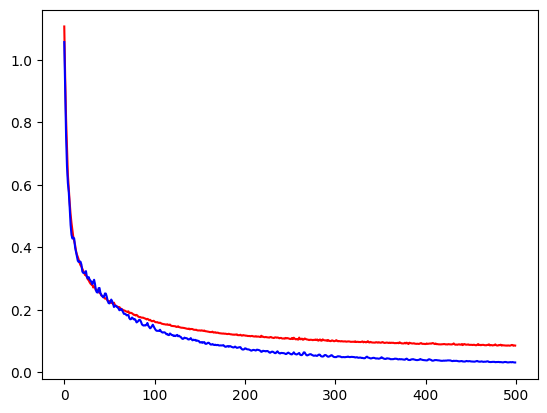

In [ ]:
# 시각화를 해보아요
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss,color='r')
plt.plot(val_loss,color='b')
plt.show()

# 12월 7일

In [ ]:
# MNIST 데이터셋을 이용해서 이미지 학습!
# Tensorflow Keras로 구현할 예정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/MNIST/train.csv')
df

# 어떤 그림인지 10개만 찍어볼게요
# fig = plt.figure()
# fig_arr = []
# img_data = df.drop('label',axis=1,inplace=False).values

# for n in range(10):
#     fig_arr.append(fig.add_subplot(2,5,n+1))
#     fig_arr[n].imshow(img_data[n].reshape(28,28),
#                       cmap='gray',
#                       interpolation='nearest')
# plt.tight_layout()
# plt.show()

# featur engineering 할 게 없어요!
# why? - 이미지 데이터는 결측치나 이상치가 있을 수 없기때문
x_data = df.drop('label',axis=1,inplace=False).values
t_data = df['label'].values

# 그래도 정규화는 진행해 줘야해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# train데이터와 test데이터로 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=1)

In [ ]:
# 모델을 구현해보아요! by. Tensorflow
model = Sequential()

model.add(Flatten(input_shape=(784,)))
model.add(Dense(units=10,
                activation='softmax'))

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 학습하기
# batch_size = n --> n개씩 나눠서 진행(데이터 양이 많을때 사용)
history = model.fit(x_data_train_norm,
          t_data_train,
          epochs=100,
          verbose=1,
          validation_split=0.2,
          batch_size=100)

Epoch 1/100
236/236 [==============================] - 2s 5ms/step - loss: 2.0303 - acc: 0.3503 - val_loss: 1.6790 - val_acc: 0.6122
Epoch 2/100
236/236 [==============================] - 1s 4ms/step - loss: 1.4458 - acc: 0.7020 - val_loss: 1.2542 - val_acc: 0.7570
Epoch 3/100
236/236 [==============================] - 1s 3ms/step - loss: 1.1205 - acc: 0.7831 - val_loss: 1.0098 - val_acc: 0.8022
Epoch 4/100
236/236 [==============================] - 1s 3ms/step - loss: 0.9274 - acc: 0.8151 - val_loss: 0.8582 - val_acc: 0.8257
Epoch 5/100
236/236 [==============================] - 1s 3ms/step - loss: 0.8025 - acc: 0.8325 - val_loss: 0.7567 - val_acc: 0.8439
Epoch 6/100
236/236 [==============================] - 1s 3ms/step - loss: 0.7154 - acc: 0.8448 - val_loss: 0.6830 - val_acc: 0.8532
Epoch 7/100
236/236 [==============================] - 1s 3ms/step - loss: 0.6513 - acc: 0.8546 - val_loss: 0.6282 - val_acc: 0.8607
Epoch 8/100
236/236 [==============================] - 1s 3ms/step - 

In [ ]:
# 평가 진행
model.evaluate(x_data_test_norm,
               t_data_test)

# 결과 report(accuracy, recall, precision, f1)값을 구해보아요!
# classification_report()를 이용하는데.. 주의해야 할 점은 one-hot 으로 표현하지
# 않아요. 1차원으로 표현해요(label값을 이용한 1차원 값으로 사용)
import tensorflow as tf
predict_label = tf.argmax(model.predict(x_data_test_norm),axis=1).numpy()
print(classification_report(t_data_test, predict_label))

394/394 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1240
           1       0.95      0.97      0.96      1405
           2       0.92      0.89      0.90      1253
           3       0.90      0.88      0.89      1305
           4       0.92      0.93      0.93      1222
           5       0.88      0.85      0.87      1139
           6       0.94      0.96      0.95      1241
           7       0.93      0.92      0.92      1320
           8       0.89      0.89      0.89      1219
           9       0.88      0.90      0.89      1256

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600



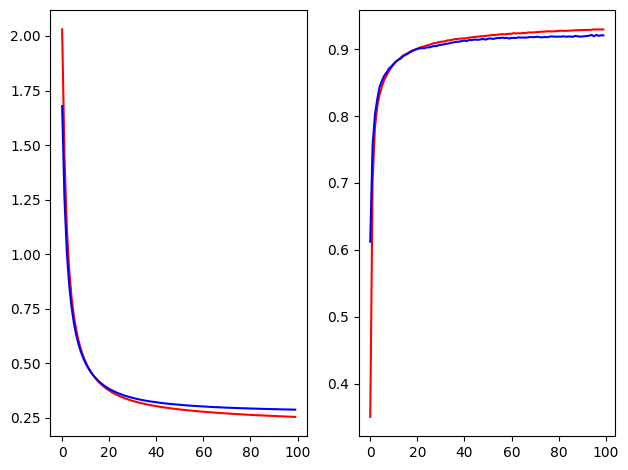

In [ ]:
# 시각화를 해봐요
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(loss,color='r')
ax1.plot(val_loss, color='b')

ax2.plot(acc,color='r')
ax2.plot(val_acc,color='b')

plt.tight_layout()
plt.show()

In [ ]:
# 제출파일 형식으로 결과를 kaggle에 제출해서
# 우리가 작성한 모델의 accuracy를 평가 받아 보아요!
test = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/MNIST/test.csv')
test

submission = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/MNIST/sample_submission.csv')
submission

test_norm = scaler.transform(test.values)
predict = model.predict(test_norm)

submission['Label'] = np.argmax(predict,axis=1)
submission.to_csv('./su.csv',index=False)

875/875 [==============================] - 1s 1ms/step


In [ ]:
# Fashion MNIST 데이터를 가지고 진행해 보아요!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/F_MNIST/fashion-mnist_train.csv')
df

# MNIST와 같이 10개를 출력해보기
# img_data = df.drop('label',axis=1,inplace=False).values
# fig_arr = []
# fig = plt.figure()
# for n in range(10):
#     fig_arr.append(fig.add_subplot(2,5,n+1))
#     fig_arr[n].imshow(img_data[n].reshape(28,28),
#                       cmap='gray',
#                       interpolation='nearest')

# plt.tight_layout()
# plt.show()

# 마찬가지로 featur engineering은 필요없음
x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values

# 정규화 진행
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터셋 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=1)

keras_model = Sequential()

keras_model.add(Flatten(input_shape=(784,)))

keras_model.add(Dense(units=10,
                      activation='softmax'))

keras_model.compile(optimizer=Adam(learning_rate=1e-4),
                    loss='sparse_categorical_crossentropy',
                    metrics = ['acc'])

keras_model.fit(x_data_train_norm,
                t_data_train,
                epochs=100,
                verbose=1,
                validation_split=0.2,
                batch_size=100)

keras_model.evaluate(x_data_test_norm,t_data_test)

import tensorflow as tf
predict = tf.argmax(keras_model.predict(x_data_test_norm),axis=1).numpy()

print(classification_report(t_data_test, predict_label))

# 12월 8일

### 비지도 학습
- 지도 학습과 달리 종속변수(target)가 없는 data를 가지고 학습을 진행하는 것
- 대표적인 알고리즘으로 K-Means와 DBSCAN이 있다

### K-Means
- 클러스터(군집)의 개수를 hyperparameter로 정해줘야 한다
- EM 알고리즘을 기반으로 작동
- 거리가 멀면서 밀접하게 연관된 data를 성공적으로 군집화 하기 어려운 단점 존재!
- 속도면에서 장점이 있다
- EM의 E (Expectation)의 의미로 가장 가까운 centroid에 데이터를 군집으로 할당.
- EM의 M (Maximization)의 의미로 cluster경계에 대한 중심점(centroids)를 결정

### DBSCAN
- Density Based Spartial Clustering of Application with Noise의 줄임말
- K-Means와 달리 클러스터의 개수를 지정해줄 필요 없다
- 거리 기반이 아닌 밀도 기반
- 최초 임의의 점 하나에서 부터 시작해서 퍼져나가면서 생성
- 주요 용어
  - epsilon(입실론) : 클러스터의 반경
  - minPts : 클러스터를 이루는 최소 개체수
  - Core Point : 클러스터의 중심점
  - Border Point : 클러스터 안에 위치하지만 Core가 아닌 점
  - Noise Point : 클러스터 안에 포함되지 못한 Data

### 차원 축소
- 고차원의 데이터를 저차원으로 변경
- 저차원으로 변경한다 해서 columns을 삭제한다는 의미가 아니다!!
- 저차원 data의 표현의 원본의 고차원 data를 잘 표현할 수 있어야 한다는 전제 필요!!
- 정보 손실의 문제가 필연적으로 발생!
- 여러 알고리즘이 있지만 주성분 분석(PCA)에 대해 배울 예정이에요

In [ ]:
# K-Means 알고리즘
# 필요 모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

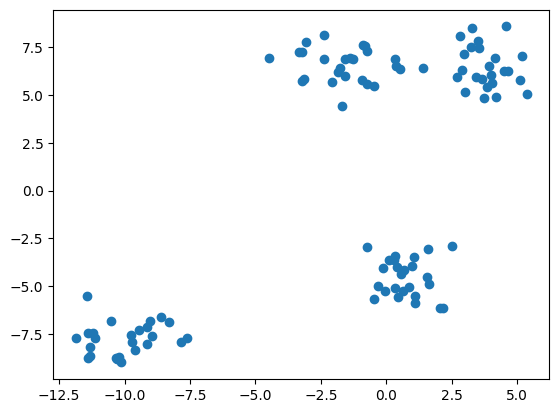

In [ ]:
# 데이터부터 만들어요
# 랜덤하게 데이터를 생성할거에요!

# n_samples = 생성할 데이터 개수
# centers = 클러스터의 개수
# n_features = 생성할 데이터의 차원
# random_state = 난수 재현률
# points : 생성된 데이터의 feature
# labels : 각 데이터 포인트의 소속 클러스터 레이블

points, labels = make_blobs(n_samples=100,
                            centers=4,
                            n_features=2,
                            random_state=100)

points
labels

# 랜덤으로 생성된 데이터를 2차원 평면에 scatter를 이용해서
# 표현해 보아요!
plt.scatter(points[:,0],points[:,1])
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4,
                n_init='auto',
                random_state=100)
kmeans.fit(points)
kmeans.labels_

# 위 결과를 시각화
my_color = {0 : 'red', 1 : 'blue', 2 : 'green', 3 : 'margenta'}
for n in range(4):
    cluster_sub_points = points[kmeans.labels_ == n]
    plt.scatter(cluster_sub_points[:,0],
                cluster_sub_points[:,1],
                c=my_color[n],
                label=f'cluster#{n}')

plt.show()

In [ ]:
# predict
new_point = np.array([[0.0,0.0]])
kmeans.predict(new_point)

array([2], dtype=int32)

In [ ]:
# 랜덤 데이터를 사용해서 확인했으니
# 이제 붓꽃 데이터를 사용해서 확인해보아요
# feature는 두 개 사용할 거에요!
# 꽃받침길이, 꽃받침의 너비

# 필요 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

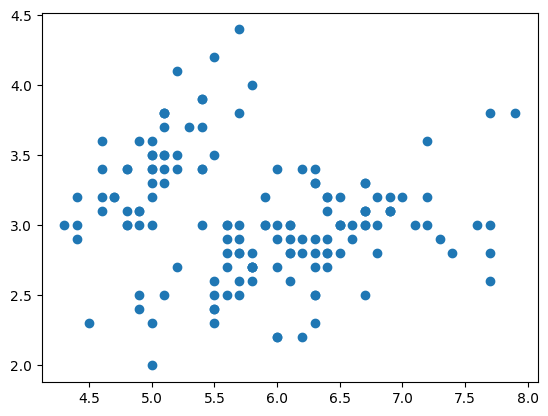

In [ ]:
# 일단 먼저 그려보아요
iris=load_iris()
sample = iris.data

x = sample[:,0]
y = sample[:,1]

plt.scatter(x,y)
plt.xlabel('Sepal Height')
plt.ylabel('Sepal Width')
plt.show()

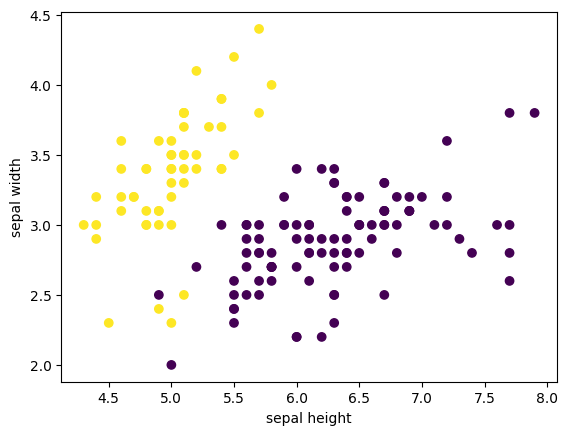

In [ ]:
# KMeans ver.
model = KMeans(n_clusters=2,
               n_init='auto')

model.fit(sample)
labels = model.predict(sample)

x = sample[:,0]
y = sample[:,1]

plt.scatter(x,y,c=labels)
plt.xlabel('sepal height')
plt.ylabel('sepal width')
plt.show()

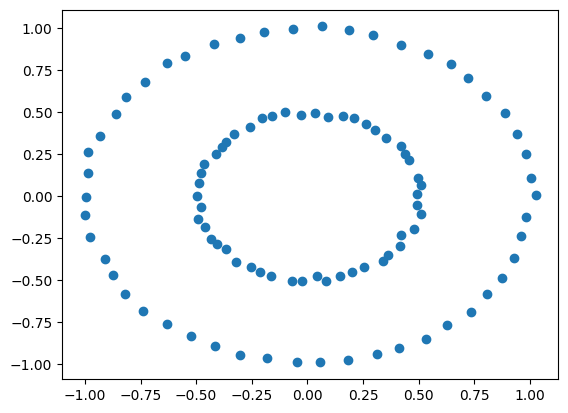

In [ ]:
# iris data로도 잘 작동하는 것 같아요
# but, KMeans 알고리즘이 잘 적용되지 않는 경우들도 존재
# 주어진 데이터의 분포에 따라 의도치 않은 상황이 발생하기 때문
# 바로 알고리즘의 특성 ㄸㅐ문!

# 총 3가지 경우에 대해서 알아볼 거에요
# 원형 데이터, 달, 사선

# 먼저 원형 데이터에 대해서 알아봅시다
# 필요 모듈 import
from sklearn.datasets import make_circles

# 시작
# make_circles() -> 두 개의 원으로 된 데이터 셋 생성
# factor = 두 원 사이의 거리, 1에 가까울수록 거리가 가깝고, 0에 가까울수록 멀어진다
# noise = 데이터에 추가되는 무작위 노이즈의 양
#         값이 커지면 원의 형태가 변형됨
circle_points, circle_labels = make_circles(n_samples=100,
                                            factor=0.5,
                                            noise=0.01)
circle_points.shape
circle_labels.shape

plt.scatter(circle_points[:,0],
            circle_points[:,1])
plt.show()

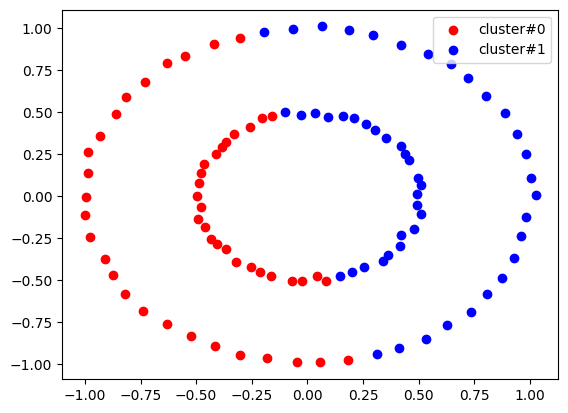

In [ ]:
# K-Means ver.
circle_model = KMeans(n_clusters=2,
                      n_init='auto')

circle_model.fit(circle_points)

my_color = {0: 'red', 1: 'blue'}
# 각 cluster마다 scatter를 반복적으로 그리면 되요!
for n in range(2):
    cluster_sub_points = circle_points[circle_model.labels_ == n]
    plt.scatter(cluster_sub_points[:,0],
                cluster_sub_points[:,1],
                color=my_color[n],
                label=f'cluster#{n}')

plt.legend()
plt.show()

# 결과가 우리가 생각한거랑 다른 것을 알 수 있어요!

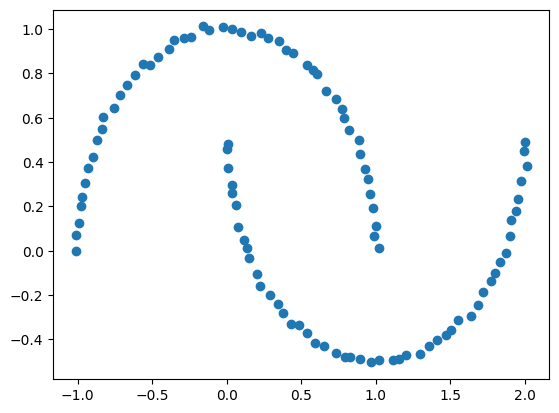

In [ ]:
# 2번째 달 데이터에 대해서도 알아보아요!
from sklearn.datasets import make_moons

moon_points, moon_labels = make_moons(n_samples=100,
                                     noise=0.01)

plt.scatter(moon_points[:,0],
            moon_points[:,1])
plt.show()

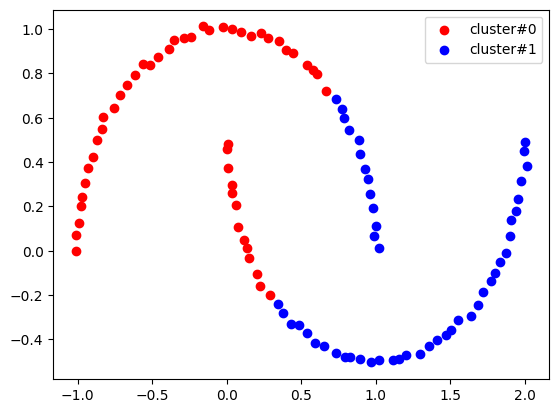

In [ ]:
moon_model = KMeans(n_clusters=2,
                    n_init='auto')

moon_model.fit(moon_points)

my_color = {0:'red',1:'blue'}

for n in range(2):
    moon_sub_points = moon_points[moon_model.labels_==n]
    plt.scatter(moon_sub_points[:,0],
                moon_sub_points[:,1],
                color=my_color[n],
                label=f'cluster#{n}')
plt.legend()
plt.show()

# 2번 역시 우리가 원하는 모습과는 다른 것을 알 수 있어요

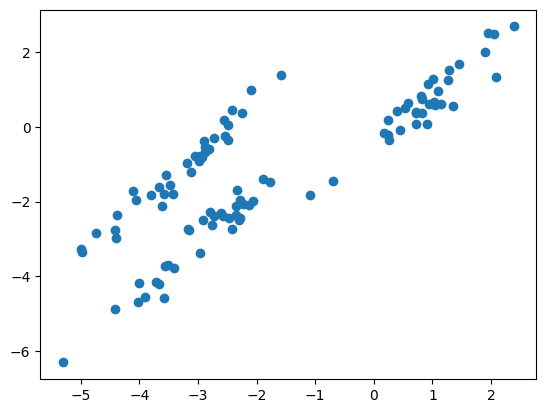

In [ ]:
# 마지막 3번째, 사선 데이터에요!
from sklearn.datasets import make_blobs

diag_points, diag_labels = make_blobs(n_samples=100,
                                     random_state=170)

# 행렬 곱으로 데이터를 사선으로 변경
transform = [[0.6,0.6],
             [-0.4,-0.8]]
diag = np.dot(diag_points,transform)

plt.scatter(diag[:,0], diag[:,1])
plt.show()

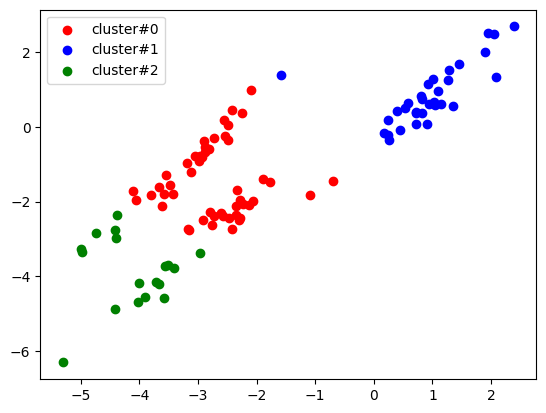

In [ ]:
diag_model = KMeans(n_clusters=3,
                    n_init='auto')

diag_model.fit(diag)

my_color = {0:'red', 1:'blue', 2:'green'}

for n in range(3):
    diag_sub_points = diag[diag_model.labels_==n]
    plt.scatter(diag_sub_points[:,0],
                diag_sub_points[:,1],
                color=my_color[n],
                label=f'cluster#{n}')

plt.legend()
plt.show()
# 이것도 마찬가지네요..!

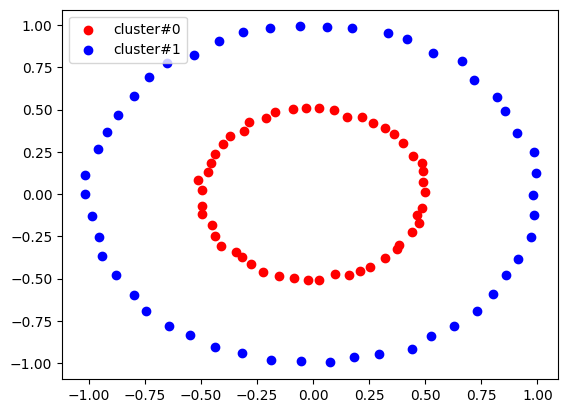

In [ ]:
# 그럼 이제 DBSCAN을 사용해서 위 문제들을 해결해봅시다
# 1번.
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles

circle_points, circle_labels = make_circles(n_samples=100,
                                            factor=0.5,
                                            noise=0.01)

epsilon=0.2
minPts = 3

circle = DBSCAN(eps=epsilon,
                min_samples=minPts)

circle.fit(circle_points)

# cluster의 개수는 몇개?
max(circle.labels_)+1

my_color = {0: 'red', 1: 'blue'}
for n in range(2):
    cluster_sub_points = circle_points[circle.labels_ == n]
    plt.scatter(cluster_sub_points[:,0],
                cluster_sub_points[:,1],
                color=my_color[n],
                label=f'cluster#{n}')

plt.legend()
plt.show()

# 오! 이제 우리가 원하는대로 결과가 나오네요!

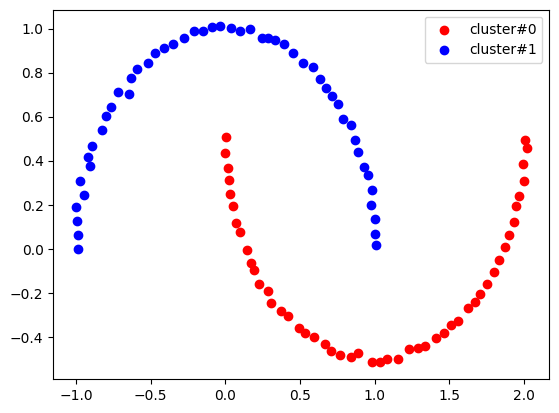

In [ ]:
# 2번.
from sklearn.datasets import make_moons

moon_points, moon_labels = make_moons(n_samples=100,
                                     noise=0.01)

moon = DBSCAN(eps=epsilon,
               min_samples=minPts)

moon.fit(moon_points)

my_color = {0:'red',1:'blue'}

for n in range(2):
    moon_sub_points = moon_points[moon.labels_==n]
    plt.scatter(moon_sub_points[:,0],
                moon_sub_points[:,1],
                color=my_color[n],
                label=f'cluster#{n}')
plt.legend()
plt.show()

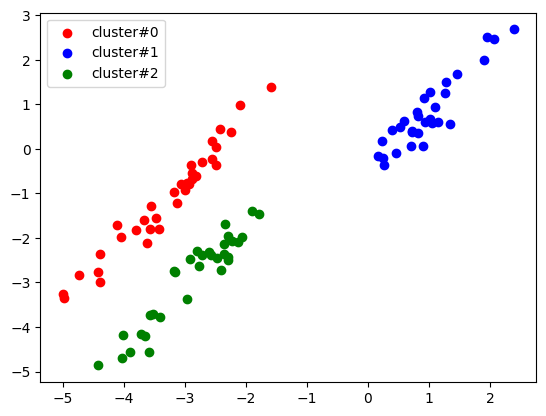

In [ ]:
diag_points, diag_labels = make_blobs(n_samples=100,
                                     random_state=170)

# 행렬 곱으로 데이터를 사선으로 변경
transform = [[0.6,0.6],
             [-0.4,-0.8]]
diag = np.dot(diag_points,transform)

diag_m = DBSCAN(eps=0.7,
              min_samples=minPts)

diag_m.fit(diag)

my_color = {0:'red', 1:'blue', 2:'green'}

for n in range(3):
    diag_sub_points = diag[diag_m.labels_==n]
    plt.scatter(diag_sub_points[:,0],
                diag_sub_points[:,1],
                color=my_color[n],
                label=f'cluster#{n}')

plt.legend()
plt.show()

In [ ]:
# 차원축소 중 주성분 분석(PCA)에 대해 알아보아요!
# 사용할 예제는 iris에요!

# 이 데이터를 차원축소예제로 드는 이유는..
# 독립변수에 대해 상관관계분석을 해 보면 상관계수가 높은 feature가 존재!
# 이런 경우 차원축소를 이용하면 훨씬 더 좋은 효과를 얻을 수 있어요!

# 필요 모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data = iris.data,
                       columns=['sepal_height','sepal_width','petal_height','petal_width'])
iris_df

# 상관관계 분석
iris_df.corr()

# feature들 간의 상관관계가 높은 것을 알 수 있다
# 따라서 주성분분석(PCA)을 통해 차원을 축소해서 사용하면
# 약간의 데이터 로스가 발생하겠지만 모델의 복잡도가 줄고
# overfitting도 줄어들어서 더 좋은 모델이 만들어 질 수 도 있어요!

# 주성분을 몇개로 하면 좋을까요?
# 주성분의 분산을 통해 알 수 있어요
from sklearn.decomposition import PCA
pca = PCA(random_state=1004)
pca.fit_transform(iris_df)
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [ ]:
# 원래 Iris 데이터는 4개의 feature로 되어 있고
# 종속변수를 가지고 있어요. (붓꽃의 품종)
# 이전에 우리 다중분류할때 이 예제를 이용했었는데
# 그거 다시 한번 실행해서
# 원래 데이터로 다중분류했을때의 모델의 정확도를 산출
# 여러분들이 구현할 꺼예요!

# 4개의 독립변수를 차원축소해서 2개의 주성분으로 줄여요!
# 이렇게 데이터를 변환한 다음 다중분류 모델을 만들어서
# 학습하고 정확도를 산출할꺼예요!

# 필요 모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [ ]:
iris = load_iris()
x_data = iris.data
t_data = iris.target

# 결측치와 이상치는 처리하지 않아요!
# 정규화 진행
scaler = StandardScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# PCA를 사용해서 차원축소를 진행
# 주성분은 2개로 하죠!
n_components = 2
pca = PCA(n_components=n_components)
x_data_norm_pca = pca.fit_transform(x_data_norm)

# 데이터 분리
x_data_train_norm_pca, x_data_test_norm_pca, t_data_train, t_data_test = \
train_test_split(x_data_norm_pca,
                 t_data,
                 stratify=t_data,
                 test_size=0.3)

# 다중분류를 위한 모델 생성(sklearn)
sklearn_model = LogisticRegression()

sklearn_model.fit(x_data_train_norm_pca,
                  t_data_train)

# 평가를 위해 예측치 알아내기
predict = sklearn_model.predict(x_data_test_norm_pca)
accuracy = accuracy_score(t_data_test,predict)
accuracy

0.9333333333333333

In [ ]:
# 차원축소를 진행하지 않은 ver.
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.3)

model = LogisticRegression()

model.fit(x_data_train_norm,
          t_data_train)

predict = model.predict(x_data_test_norm)
acc = accuracy_score(t_data_test,predict)
acc

0.9555555555555556